##Задача классификации

В качестве данных для задачи классификации я выбрала данные о раке молочной железы, из-за постоянной актуальности данной проблемы. Рак молочной железы является самым распространенным видом рака, для женщин в России риск заболеть им составляет 5-6%, а значит крайне важна его правильное определение и классификация. В качестве основной метрики качества для сравнения моделей была выбрана точность, как наиболее распространенная метрика, но также расчитаны матрица ошибок, полнота, F1-мера и AUC.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gkalpolukcu/knn-algorithm-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1/KNNAlgorithmDataset.csv


In [ ]:
data = pd.read_csv('/root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1/KNNAlgorithmDataset.csv')

In [ ]:
data = data.drop(['id','Unnamed: 32'],axis=1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = data.drop('diagnosis',axis=1)
y = data['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
scaler = StandardScaler()
knn = KNeighborsClassifier()
pipl =  Pipeline([('scaler',scaler),('knn',knn)])
k_values = np.arange(1,31)
param_grid = {'knn__n_neighbors':k_values}
final_model = GridSearchCV(estimator=pipl,param_grid=param_grid,cv=5,scoring='accuracy')
final_model.fit(X_train,y_train)
final_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [ ]:
df = pd.DataFrame(final_model.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007948,0.001366,0.013125,0.002620,1,{'knn__n_neighbors': 1},0.906977,0.976471,0.952941,0.941176,0.964706,0.948454,0.023843,29
1,0.005527,0.000376,0.008952,0.000769,2,{'knn__n_neighbors': 2},0.872093,0.976471,0.941176,1.000000,0.964706,0.950889,0.043727,23
2,0.005349,0.000339,0.009277,0.000548,3,{'knn__n_neighbors': 3},0.906977,0.988235,0.929412,1.000000,0.964706,0.957866,0.035053,9
3,0.005537,0.000403,0.010127,0.001280,4,{'knn__n_neighbors': 4},0.906977,0.976471,0.941176,1.000000,0.952941,0.955513,0.031579,14
4,0.005578,0.000641,0.009114,0.000577,5,{'knn__n_neighbors': 5},0.906977,0.988235,0.952941,1.000000,0.976471,0.964925,0.032889,1
5,0.007182,0.001348,0.011137,0.002760,6,{'knn__n_neighbors': 6},0.895349,0.988235,0.941176,1.000000,0.952941,0.955540,0.037099,13
6,0.006645,0.001975,0.009467,0.000771,7,{'knn__n_neighbors': 7},0.895349,0.988235,0.952941,1.000000,0.976471,0.962599,0.037052,2
7,0.005902,0.000764,0.010205,0.001348,8,{'knn__n_neighbors': 8},0.895349,0.976471,0.964706,1.000000,0.964706,0.960246,0.034914,3
8,0.005991,0.000542,0.011117,0.002137,9,{'knn__n_neighbors': 9},0.895349,0.976471,0.964706,0.988235,0.976471,0.960246,0.033291,3
9,0.005652,0.000420,0.010714,0.002993,10,{'knn__n_neighbors': 10},0.906977,0.976471,0.964706,1.000000,0.952941,0.960219,0.030837,6


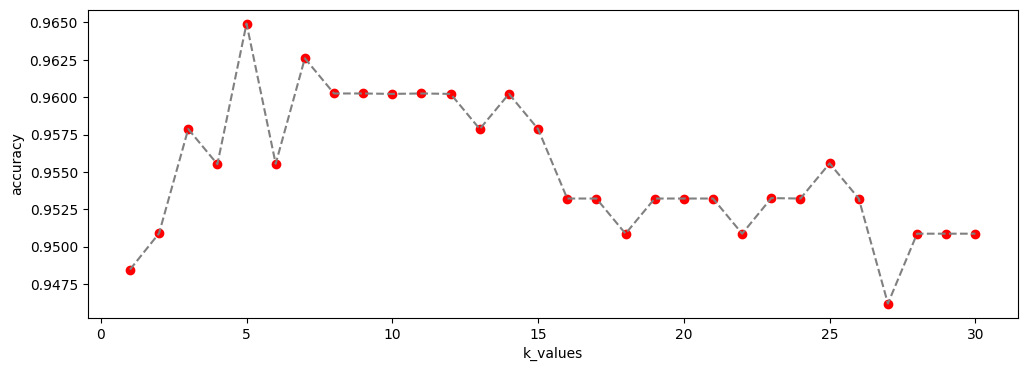

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(k_values,df['mean_test_score'],c='gray',ls='--')
plt.xlabel('k_values')
plt.ylabel('accuracy')
plt.scatter(k_values,df['mean_test_score'],c='red',marker='o');

<Axes: >

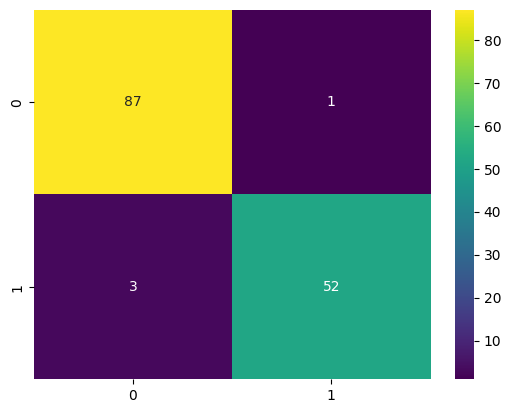

In [ ]:
y_pred = final_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='viridis')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        88
           M       0.98      0.95      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
roc_auc_score(y_test,final_model.predict_proba(X_test)[:,1])

0.9916322314049587

###Гипотеза о пропущенных значениях

In [ ]:
print(data.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


###Гипотеза о распределении целевой переменной

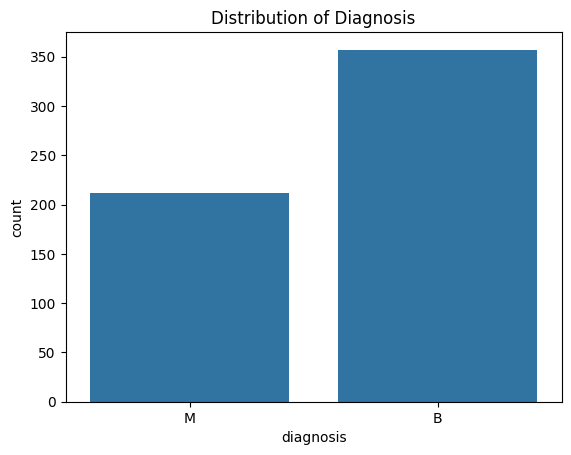

In [ ]:
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

###Гипотеза о выборе гиперпараметра K

In [ ]:
param_grid = {'knn__n_neighbors': k_values}
final_model = GridSearchCV(estimator=pipl, param_grid=param_grid, cv=5, scoring='accuracy')
final_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

###Гипотеза о производительности модели

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        88
           M       0.98      0.95      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

ROC AUC Score:  0.9916322314049587


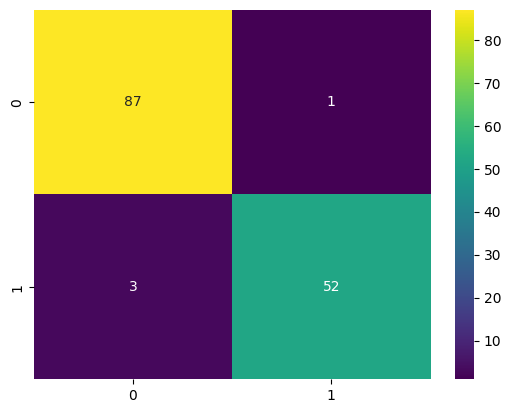

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='viridis')
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])
print("ROC AUC Score: ", roc_auc)

###Обучение с расширенным параметром k

Лучшие параметры: {'memory': None, 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'knn': KNeighborsClassifier(), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'knn__algorithm': 'auto', 'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__metric_params': None, 'knn__n_jobs': None, 'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'uniform'}


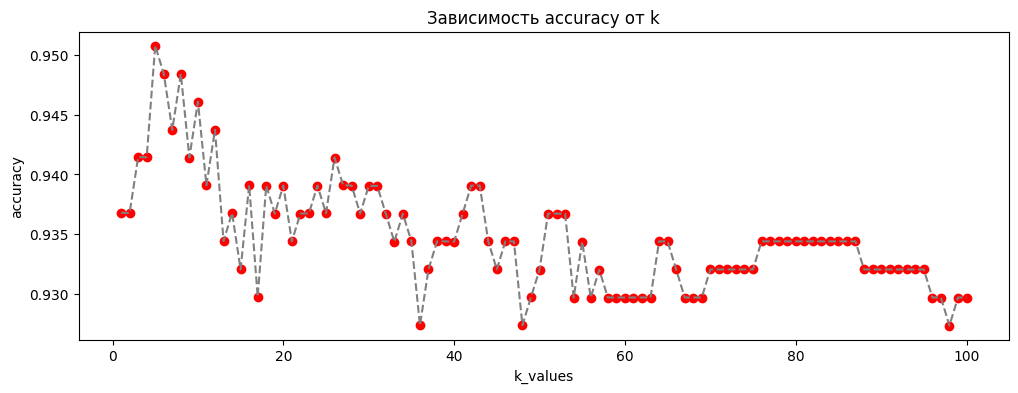

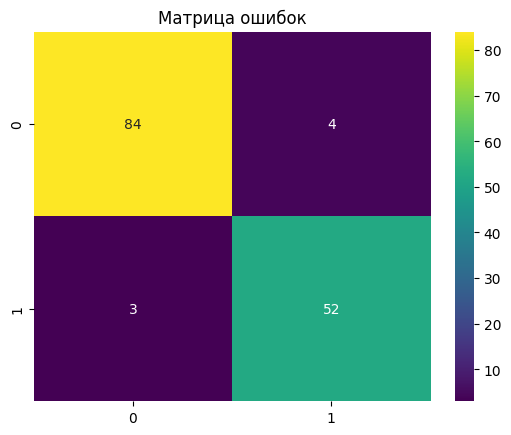

              precision    recall  f1-score   support

           B       0.97      0.95      0.96        88
           M       0.93      0.95      0.94        55

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

ROC AUC: 0.9896694214876034


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

import os

data = pd.read_csv('/root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1/KNNAlgorithmDataset.csv')
data = data.drop(['id','Unnamed: 32'],axis=1)

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.25, random_state=101)

scaler = StandardScaler()
knn = KNeighborsClassifier()

pipl = Pipeline([('scaler', scaler), ('knn', knn)])

k_values = np.arange(1, 101)
param_grid = {'knn__n_neighbors': k_values}
final_model = GridSearchCV(estimator=pipl, param_grid=param_grid, cv=5, scoring='accuracy')  # Используем f1-score
final_model.fit(X_train, y_train)

print("Лучшие параметры:", final_model.best_estimator_.get_params())

df = pd.DataFrame(final_model.cv_results_)
plt.figure(figsize=(12, 4))
plt.plot(k_values, df['mean_test_score'], c='gray', ls='--')
plt.xlabel('k_values')
plt.ylabel('accuracy')
plt.title('Зависимость accuracy от k')
plt.scatter(k_values, df['mean_test_score'], c='red', marker='o')
plt.show()

y_pred = final_model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis')
plt.title('Матрица ошибок')
plt.show()

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])
print("ROC AUC:", roc_auc)


Как видно при увеличении диапозона значений k понижается точность, что может быть связано с тем, что при увеличении k, модель учитывает больше соседей при принятии решения о классе, это может привести к ситуации, когда большинство соседей принадлежат к одному классу, что может снизить точность для менее представленных классов.

##Задача регрессии

Для данной задачи я выбрала датасет с данными по оценкам IMDB сериалов и фильмов Netflix, так как с помощью машинного обучения можно было бы предугадывать оценку новых релизов и на основе этого рекомендовать из пользователям. В качесте основной метрики качества будет выступать средняя квадратическая ошибка, так как она чувствительна к большим ошибкам и имеет хорошие статистические свойства.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/netflix-imdb-scores")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2


In [ ]:
import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv


In [ ]:
data = pd.read_csv('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv')

In [ ]:
data.head()

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv')

data['imdb_votes'] = data['imdb_votes'].fillna(data['imdb_votes'].mean())
data['age_certification'] = data['age_certification'].fillna(data['age_certification'].mode()[0])

In [ ]:
X = data[['release_year', 'runtime', 'imdb_votes']]
y = data['imdb_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

Mean Squared Error: 1.4453328287606433
Mean Absolute Error: 0.9411542100283822
R² Score: -0.015015610328741769


###Улучшение бейзлайна

Для улучшения бейзлайна включим другие признаки, а именно тип (сериал или фильм) и возрастное ограничение. А так же увеличим значение параметра k.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv')

data['imdb_votes'] = data['imdb_votes'].fillna(data['imdb_votes'].mean())
data['age_certification'] = data['age_certification'].fillna(data['age_certification'].mode()[0])

X = data[['release_year', 'runtime', 'imdb_votes', 'type', 'age_certification']]
y = data['imdb_score']

X_encoded = pd.get_dummies(X, columns=['type', 'age_certification'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 30, 39, 40, 41]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')
print(f'Best number of neighbors: {grid_search.best_params_["n_neighbors"]}')


Mean Squared Error: 1.1477459791863767
Mean Absolute Error: 0.8026253547776726
R² Score: 0.19397106162379452
Best number of neighbors: 40


Как можно заметить, значения метрик улучшились, но все еще не очень хороши, из чего можно сделать, что для данной задачи данный алгоритм не очень подходит.

##Самостоятельно имплементированные модели

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.98      0.95      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



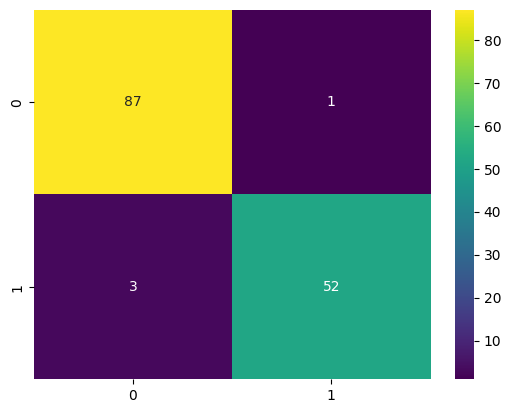

ROC AUC Score: 0.9670454545454544


In [130]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1/KNNAlgorithmDataset.csv')


for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        data[column] = data[column].fillna(data[column].mean())

data.reset_index(drop=True, inplace=True)


data = data.drop(['id','Unnamed: 32'],axis=1)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=101)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

k = 5
model = KNN(k=k)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis')
plt.show()

roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')


Регрессия без улучшений

In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class KNeighborsRegressorCustom:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y.values

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_values = self.y_train[k_indices]
        return np.mean(k_nearest_values)

data = pd.read_csv('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv')

data['imdb_votes'] = data['imdb_votes'].fillna(data['imdb_votes'].mean())
data['age_certification'] = data['age_certification'].fillna(data['age_certification'].mode()[0])

X = data[['release_year', 'runtime', 'imdb_votes']]
y = data['imdb_score']

#X_encoded = pd.get_dummies(X, columns=['type', 'age_certification'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressorCustom(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Squared Error: 1.3092041627246924
Mean Absolute Error: 0.8612298959318826
R² Score: 0.08058363040683314


Регрессия с улучшениями

In [135]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class KNeighborsRegressorCustom:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y.values

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_nearest_values = self.y_train[k_indices]
        return np.mean(k_nearest_values)

data = pd.read_csv('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv')

data['imdb_votes'] = data['imdb_votes'].fillna(data['imdb_votes'].mean())
data['age_certification'] = data['age_certification'].fillna(data['age_certification'].mode()[0])

X = data[['release_year', 'runtime', 'imdb_votes', 'type', 'age_certification']]
y = data['imdb_score']

X_encoded = pd.get_dummies(X, columns=['type', 'age_certification'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressorCustom(n_neighbors=40)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Squared Error: 1.1477825922421947
Mean Absolute Error: 0.8026537369914853
R² Score: 0.19394534932939567


Итак, для задачи классификации точность неизменилась, но уменьшилась ROC AUC, для регрессии результаты не изменились.